Analytics tasks:

•	Analyze the trend on outstanding amount for the bank

•	Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit

•	Does outstanding amount / trend affect the default behavior in next month.

•	Identify the errors in dataset

•	Clean those errors in the dataset.

•	Try to Apply Statistics like EDA, Confidence Interval, Probability Distribution & Hypothesis

•	Build ML Model using Logistic Regression & Decision Tree Classifier and Apply Feature Selection Techniques, Feature Scaling & Label Encoding Techniques[Only for Data Science Learners]


Importing all the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
df = pd.read_excel("/content/default_of_credit_card_clients.xlsx")

**Understanding the Data**

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df = df.rename(columns = {'default payment next month':'default_payment_next_month'})
df = df.rename(columns = {'PAY_0':'PAY_1'})

In [ ]:
# shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 30000, Columns: 25


**Data Cleaning - Improving the Quality of the data**

Common Issues:

Gender (1 = male; 2 = female).

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

Marital status (1 = married; 2 = single; 3 = others).

Age (year).

X6 – X11 : History of past payment

X12 – X17: Amount of bill statement

X18 – X23: Amount of previous payment

Negative BILL_AMT or PAY_AMT might be valid (refunds)

Missing/null values.

In [ ]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Inference**: There are no null or missing values in the dataset. All records are complete, which ensures data quality and reduces the need for imputation or cleaning

In [ ]:
# Check if any duplicates exist in the ID column
df['ID'].duplicated().any()

np.False_

**Inference** : There are no duplicate ID values in the dataset.

**Identify Errors in the Dataset**

In [ ]:
print(df['SEX'].unique())
print(df['SEX'].value_counts())

[2 1]
SEX
2    18112
1    11888
Name: count, dtype: int64


In [ ]:
print(df['EDUCATION'].unique())
print(df['EDUCATION'].value_counts())

[2 1 3 5 4 6 0]
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


We will replace 0, 5, and 6 with category 4 (Others), which is the most appropriate fallback

In [ ]:
# Replace invalid EDUCATION values (0, 5, 6) with 4 (Others)
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

In [ ]:
print(df['EDUCATION'].unique())

[2 1 3 4]


In [ ]:
print(df['MARRIAGE'].unique())
print(df['MARRIAGE'].value_counts())

[1 2 3 0]
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


We will replace the invalid 0 with 3 (Others), which is the safest fallback

In [ ]:
# Replace invalid MARRIAGE value 0 with 3 (Others)
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

In [ ]:
print(df['MARRIAGE'].unique())

[1 2 3]


In [ ]:
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
(df[bill_columns] < 0).sum()

,0
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


In [ ]:
negative_in_all_bills = df[(df[bill_columns] < 0).all(axis=1)].shape[0]
print(negative_in_all_bills)

88


In [ ]:
# quick stats for numeric and object columns
print(df.describe(include='all'))

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.842267      1.557267   
std     8660.398374   129747.661567      0.489129      0.744494      0.521405   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500      0.356767      0.320033      0.304067      0.258767   
std        9.217904      0.760594

***Outlier Detection***

In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = zscore(df['LIMIT_BAL'])
outliers = df[np.abs(z_scores) > 3]
print(outliers)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
12        13     630000    2          2         2   41      0      0      0   
433      434     580000    2          1         1   36      0      0      0   
451      452     600000    1          1         1   53      2      2      0   
527      528     620000    2          2         1   45      2      2      0   
555      556     630000    2          2         1   47      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29571  29572     570000    1          1         2   33      0      0      0   
29740  29741     620000    1          2         2   31      0      0      0   
29861  29862     650000    1          1         1   44      0      0      0   
29886  29887     630000    1          2         1   46      0      0      0   
29963  29964     610000    1          1         2   31      0      0      2   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['LIMIT_BAL'] < Q1 - 1.5 * IQR) |
              (df['LIMIT_BAL'] > Q3 + 1.5 * IQR)]
print(outliers)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
12        13     630000    2          2         2   41      0      0      0   
433      434     580000    2          1         1   36      0      0      0   
451      452     600000    1          1         1   53      2      2      0   
527      528     620000    2          2         1   45      2      2      0   
555      556     630000    2          2         1   47      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29571  29572     570000    1          1         2   33      0      0      0   
29740  29741     620000    1          2         2   31      0      0      0   
29861  29862     650000    1          1         1   44      0      0      0   
29886  29887     630000    1          2         1   46      0      0      0   
29963  29964     610000    1          1         2   31      0      0      2   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

<Axes: xlabel='LIMIT_BAL'>

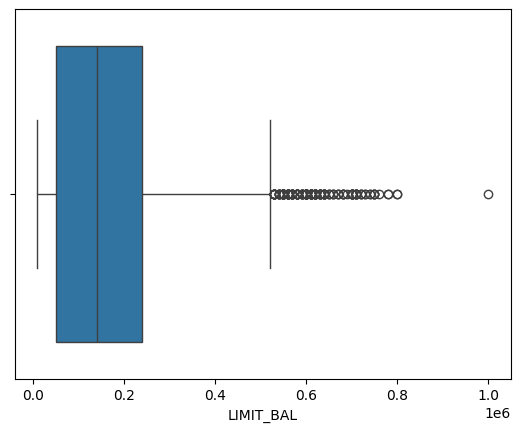

In [ ]:
import seaborn as sns
sns.boxplot(x=df['LIMIT_BAL'])

**LIMIT_BAL**

**Heavily skewed** : Credit limits often vary drastically — from 10,000 to $10,00,000+.

**Income-based differences** : High-income users may legitimately have very large credit limits, which show up as outliers.

**Business logic applies** : What looks like an outlier statistically might be normal from a business or financial viewpoint.

In [ ]:
z_scores = zscore(df['AGE'])
outliers = df[np.abs(z_scores) > 3]
print(outliers)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
246      247     250000    2          2         1   75      0      0      0   
387      388      80000    1          3         1   73      0      0      0   
1029    1030      30000    2          2         1   67      2      2      0   
1058    1059      80000    2          3         1   67      0      0      0   
1073    1074     360000    1          4         1   66      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29149  29150      30000    2          3         1   67      2      2      2   
29163  29164     360000    2          3         1   73      0      0      0   
29173  29174     360000    2          1         1   64      0      0      0   
29175  29176     160000    2          3         1   74      0      0      0   
29179  29180     500000    2          2         1   73      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['AGE'] < Q1 - 1.5 * IQR) |
              (df['AGE'] > Q3 + 1.5 * IQR)]
print(outliers)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
102      103     480000    1          1         1   63      0      0      0   
246      247     250000    2          2         1   75      0      0      0   
366      367      50000    2          2         1   61      0      0      0   
387      388      80000    1          3         1   73      0      0      0   
1029    1030      30000    2          2         1   67      2      2      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29163  29164     360000    2          3         1   73      0      0      0   
29171  29172     510000    2          3         1   61      0      0      0   
29173  29174     360000    2          1         1   64      0      0      0   
29175  29176     160000    2          3         1   74      0      0      0   
29179  29180     500000    2          2         1   73      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

<Axes: xlabel='AGE'>

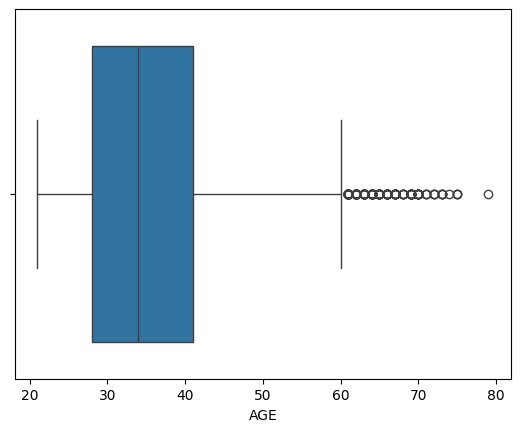

In [ ]:
import seaborn as sns
sns.boxplot(x=df['AGE'])

**AGE**
Normal distribution is not guaranteed: Ages are typically **right-skewed in financial datasets** (e.g., more young people with fewer older individuals).

Not necessarily an error: An 18-year-old and a 79-year-old are both valid ages.

**Probability Distributions**

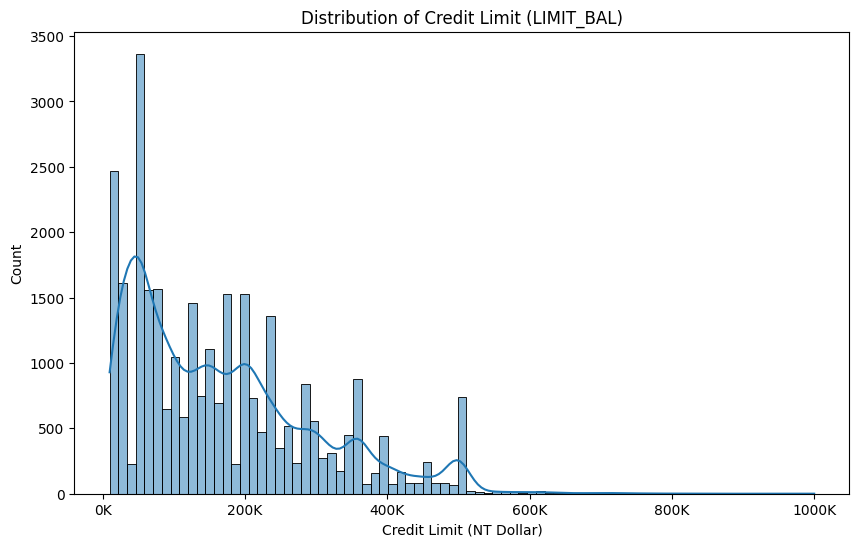

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit (NT Dollar)')
plt.ylabel('Count')

# Format x-axis to show thousands with comma
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.show()

The credit limit (LIMIT_BAL) distribution is **right-skewed**, indicating that **most** customers have **low to moderate credit limits**, while a small number of customers have very high limits. This is typical in credit card datasets due to risk management and customer segmentation practices.

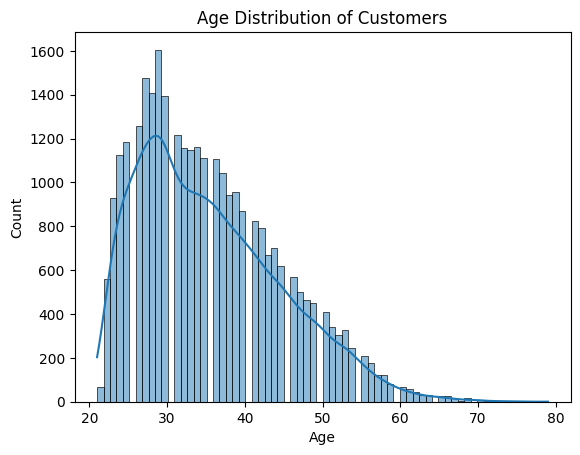

In [ ]:
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Why Is the age Column Right-Skewed in Credit Card Data?

**More young to middle-aged users:** Most credit card users are between 20 and 50 years. This creates a concentration of values in the lower age range.

**Fewer elderly users:** Fewer people above 60–70 actively apply for or use new credit cards. But some older users (e.g., 75, 80+) still exist and stretch the upper tail, causing right skew.

**Regulatory and risk reasons:** Credit card issuers often target working-age individuals due to income stability, reducing the number of very old cardholders.

**Performing Descriptive Statistics**

**On Numerical Data**

In [ ]:
print(f"Average Limit balance is {df['LIMIT_BAL'].mean()}")
print(f"Average Age is {df['AGE'].mean()}")

Average Limit balance is 167484.32266666667
Average Age is 35.4855


In [ ]:
print(f"Minimum Limit balance is {df['LIMIT_BAL'].min()}")
print(f"Minimum Age is {df['AGE'].min()}")


Minimum Limit balance is 10000
Minimum Age is 21


In [ ]:
print(f"Maximum Limit balance is {df['LIMIT_BAL'].max()}")
print(f"Maximum Age is {df['AGE'].max()}")

Maximum Limit balance is 1000000
Maximum Age is 79


In [ ]:
print(f"Variance of Limit Balance is {df['LIMIT_BAL'].var()}")
print(f"Variance of Age is {df['LIMIT_BAL'].var()}")

Variance of Limit Balance is 16834455682.155386
Variance of Age is 16834455682.155386


In [ ]:
print(f"Standard Deviation of Limit Balance is {df['LIMIT_BAL'].std()}")
print(f"Standard Deviation of Age is {df['LIMIT_BAL'].std()}")

Standard Deviation of Limit Balance is 129747.66156719506
Standard Deviation of Age is 129747.66156719506


In [ ]:
print(f"Mode of Limit Balance is {df['LIMIT_BAL'].mode()}")
print(f"Mode of Age is {df['AGE'].mode()}")

Mode of Limit Balance is 0    50000
Name: LIMIT_BAL, dtype: int64
Mode of Age is 0    29
Name: AGE, dtype: int64


In [ ]:
print(f"Range of Limit Balance is {df['LIMIT_BAL'].max() - df['LIMIT_BAL'].min()}")
print(f"Range of Age is {df['LIMIT_BAL'].max() - df['LIMIT_BAL'].min()}")

Range of Limit Balance is 990000
Range of Age is 990000


In [ ]:
q1 = df['LIMIT_BAL'].quantile(0.25)
q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = q3-q1
IQR
print(f"IQR of Limit Balance is {IQR}")
q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)
IQR = q3-q1
IQR
print(f"IQR of Age is {IQR}")

IQR of Limit Balance is 190000.0
IQR of Age is 13.0


In [ ]:
print(f"Skew of Limit Balance is {df['LIMIT_BAL'].skew()}")
print(f"Skew of Age is {df['LIMIT_BAL'].skew()}")

Skew of Limit Balance is 0.992866960519544
Skew of Age is 0.992866960519544


In [ ]:
print(f"kurtosis of Limit Balance is {df['LIMIT_BAL'].kurtosis()}")
print(f"kurtosis of Age is {df['LIMIT_BAL'].kurtosis()}")

kurtosis of Limit Balance is 0.536262896398668
kurtosis of Age is 0.536262896398668


**Final Summary and Key Inference:**

The customer base primarily consists of working-age individuals around 35 years old, with most between 28 to 41 years, showing a slightly younger, right-skewed age distribution. This suggests the bank is targeting economically active individuals with potentially stable income.

Credit limits show high variability, ranging from $10,000 to $10,00,000, with an average limit of around $1.67 lakhs. The distribution is positively skewed, indicating that while most customers have moderate limits, a few have very high credit lines, possibly reflecting a mix of middle-income and high-net-worth individuals.

**Key Insight**:
The bank's credit card portfolio serves a young, financially active population, with wide credit exposure, highlighting the need for risk-based segmentation and credit scoring models to manage high-limit accounts prudently.

**Performing Descriptive Statistics on Categorical Data**

In [ ]:
from scipy.stats import chi2_contingency

# Label mappings (for visualization only)
gender_labels = {1: 'Male', 2: 'Female'}
education_labels = {1: 'Grad School', 2: 'University', 3: 'High School', 4: 'Others'}
marital_labels = {1: 'Married', 2: 'Single', 3: 'Others'}

# --- Frequency Tables (Counts & Percentages) ---
print("Gender Frequency:")
gender_freq = df['SEX'].value_counts().rename(index=gender_labels)
gender_perc = (df['SEX'].value_counts(normalize=True) * 100).round(2).rename(index=gender_labels)
print(pd.DataFrame({'Count': gender_freq, 'Percentage': gender_perc}))

print("\nEducation Frequency:")
edu_freq = df['EDUCATION'].value_counts().rename(index=education_labels)
edu_perc = (df['EDUCATION'].value_counts(normalize=True) * 100).round(2).rename(index=education_labels)
print(pd.DataFrame({'Count': edu_freq, 'Percentage': edu_perc}))

print("\nMarital Status Frequency:")
marital_freq = df['MARRIAGE'].value_counts().rename(index=marital_labels)
marital_perc = (df['MARRIAGE'].value_counts(normalize=True) * 100).round(2).rename(index=marital_labels)
print(pd.DataFrame({'Count': marital_freq, 'Percentage': marital_perc}))

# --- Mode (Most Frequent Category) ---
print("\nModes:")
print(f"Gender: {gender_labels[df['SEX'].mode()[0]]}")
print(f"Education: {education_labels[df['EDUCATION'].mode()[0]]}")
print(f"Marital Status: {marital_labels[df['MARRIAGE'].mode()[0]]}")

# --- Cross-Tabulation ---
# Gender vs. Education
cross_gender_edu = pd.crosstab(
    df['SEX'].map(gender_labels),
    df['EDUCATION'].map(education_labels)
)
print("\nGender vs. Education:\n", cross_gender_edu)

# Marital Status vs. Education
cross_marital_edu = pd.crosstab(
    df['SEX'].map(marital_labels),
    df['EDUCATION'].map(education_labels)
)
print("\nMarital Status vs. Education:\n", cross_marital_edu)

Gender Frequency:
        Count  Percentage
SEX                      
Female  18112       60.37
Male    11888       39.63

Education Frequency:
             Count  Percentage
EDUCATION                     
University   14030       46.77
Grad School  10585       35.28
High School   4917       16.39
Others         468        1.56

Marital Status Frequency:
          Count  Percentage
MARRIAGE                   
Single    15964       53.21
Married   13659       45.53
Others      377        1.26

Modes:
Gender: Female
Education: University
Marital Status: Single

Gender vs. Education:
 EDUCATION  Grad School  High School  Others  University
SEX                                                    
Female            6231         2927     298        8656
Male              4354         1990     170        5374

Marital Status vs. Education:
 EDUCATION  Grad School  High School  Others  University
SEX                                                    
Married           4354         1990     170

<ipython-input-38-4058689976>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['SEX'].map(gender_labels), palette={'Male': 'blue', 'Female': 'pink'})


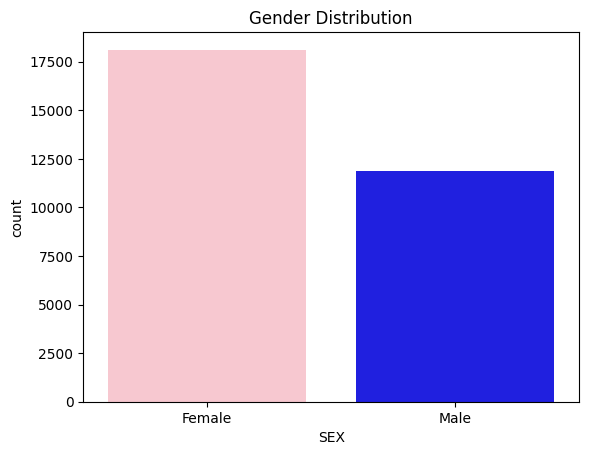

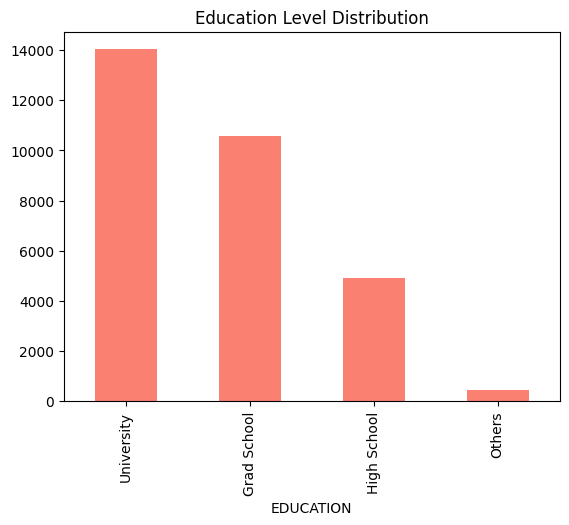

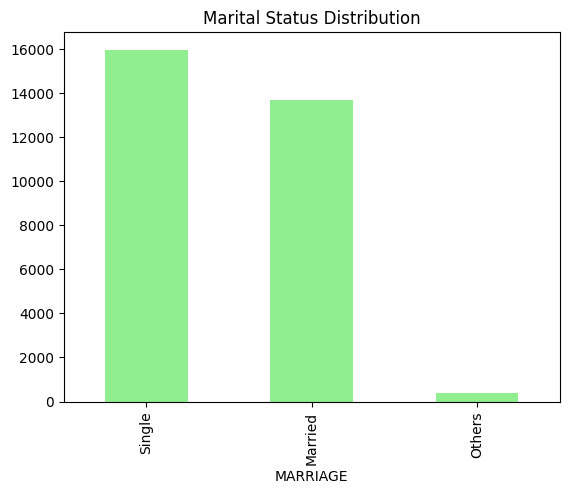

In [ ]:
# --- Bar Charts ---
# Gender
sns.countplot(x=df['SEX'].map(gender_labels), palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Gender Distribution')
plt.show()

# Education
df['EDUCATION'].map(education_labels).value_counts().plot(kind='bar', color='salmon')
plt.title('Education Level Distribution')
plt.show()

# Marital Status
df['MARRIAGE'].map(marital_labels).value_counts().plot(kind='bar', color='lightgreen')
plt.title('Marital Status Distribution')
plt.show()

Heat Map - To Check the Correlation between the columns

In [ ]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['EDUCATION', 'MARRIAGE', 'SEX'])  # or keep them if ordinal makes sense
corr_matrix = numeric_df.corr()
corr_matrix

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,1.000000,0.026179,0.018678,-0.020978,-0.010001,-0.018820,0.013700,-0.020336,-0.032450,0.019389,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,-0.167820,0.285430,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.018678,0.144713,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,-0.016948,0.056239,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.020978,-0.170745,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,-0.000819,...,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.010001,-0.197136,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.011684,...,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.018820,-0.191323,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,-0.020586,...,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,0.013700,-0.180629,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,-0.025184,...,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055
PAY_5,-0.020336,-0.170045,-0.013277,0.424473,0.462717,0.551430,0.745419,1.000000,0.740357,-0.018581,...,0.024139,0.036216,0.042616,-0.053692,-0.039586,-0.037270,-0.065943,-0.051815,-0.046110,0.260850
PAY_6,-0.032450,-0.167820,-0.016948,0.373805,0.407086,0.492827,0.602875,0.740357,1.000000,-0.019581,...,0.020598,0.041785,0.046012,-0.047804,-0.039868,-0.040160,-0.030460,-0.066875,-0.045358,0.244437
BILL_AMT1,0.019389,0.285430,0.056239,-0.000819,0.011684,-0.020586,-0.025184,-0.018581,-0.019581,1.000000,...,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644


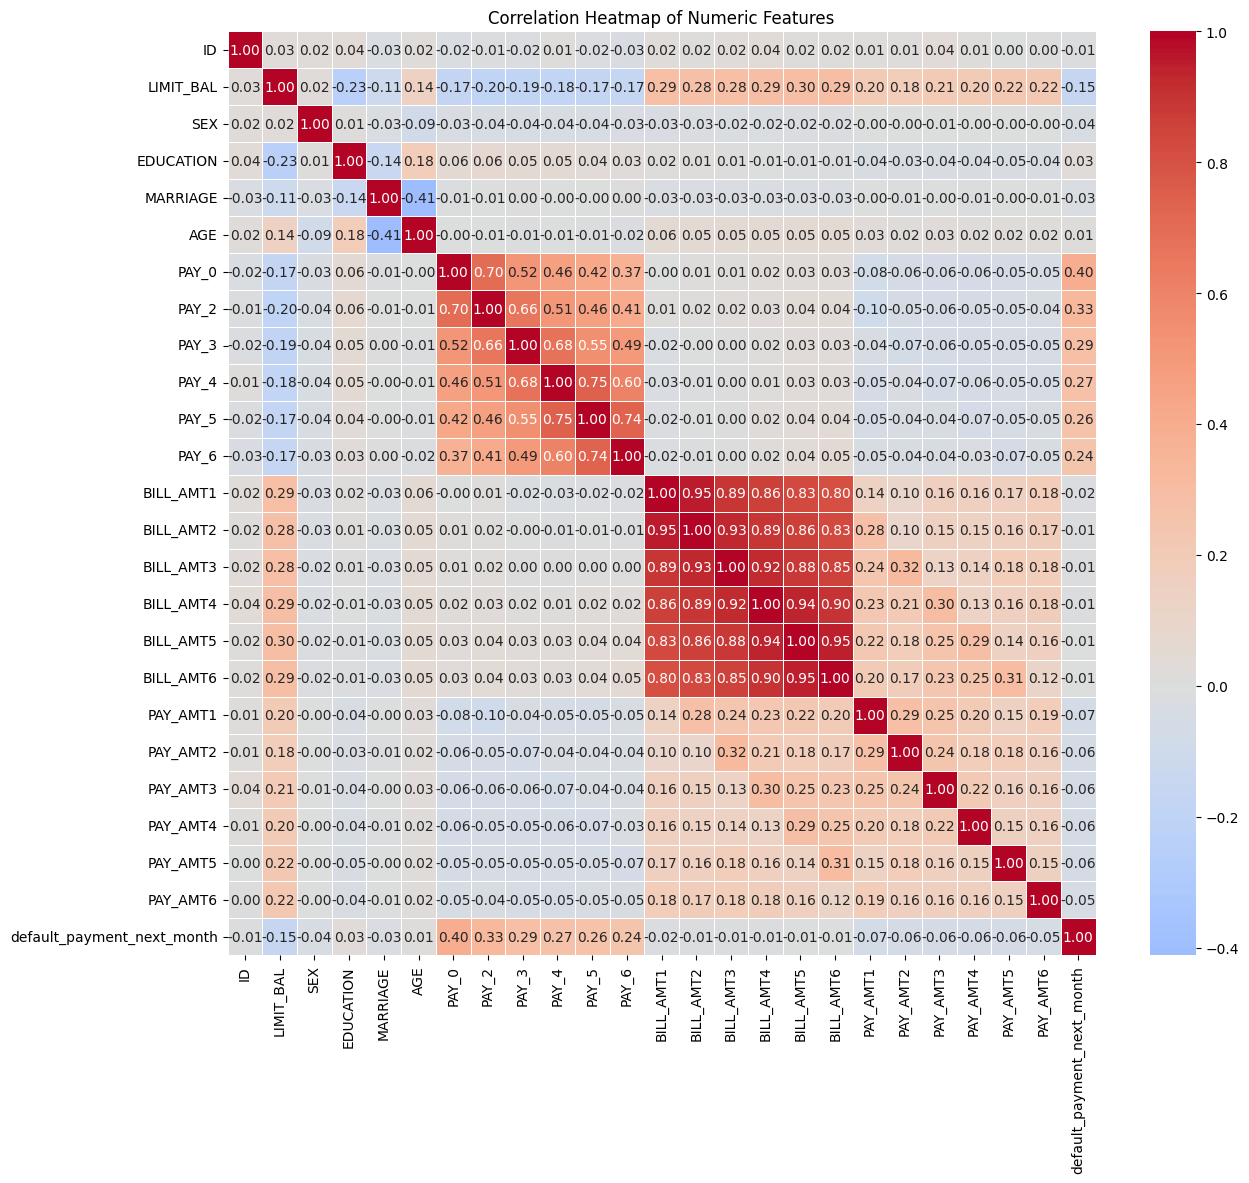

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


+1.00 = Perfect positive correlation

-1.00 = Perfect negative correlation

0 = No correlation

**Performing Inferential Statistics**

**Performing Hypothesis Testing**

**Two-Sample t-test**

**Hypotheses**:

**Null (H0)**: Mean LIMIT_BAL is the same for both defaulters and non-defaulters

**Alternative (H1)**: Mean LIMIT_BAL differs between the two groups

In [ ]:
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
group0 = df[df['default_payment_next_month'] == 0]['LIMIT_BAL']
group1 = df[df['default_payment_next_month'] == 1]['LIMIT_BAL']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)  # Welch’s t-test recommended if variances differ

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis — significant difference in means.")
else:
    print("Fail to reject the null — no significant difference in means.")

T-statistic: 28.9516
P-value: 0.0000
Reject the null hypothesis — significant difference in means.


**Chi-square test**

**Hypotheses**:

**Null (H0)**: Proportions of defaulters are the same for males and females

**Alternative (H1)**: Proportions differ between males and females

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['SEX'], df['default_payment_next_month'])

# Run the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test Statistic:", chi2)
print("P-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis — gender and default are dependent.")
else:
    print("Fail to reject the null — gender and default are independent.")


Chi-square Test Statistic: 47.70879689062111
P-value: 4.944678999412044e-12
Reject the null hypothesis — gender and default are dependent.


**Pearson correlation** test Correlation Hypotheses (Numeric vs Numeric)

Hypothesis for Correlation (Pearson's r)

**Null Hypothesis (H0)**: No linear correlation between the two variables.

**Alternative Hypothesis (H1)**: A linear correlation exists (positive or negative).

In [ ]:
from scipy.stats import pearsonr

# Variables
x = df['LIMIT_BAL']
y = df['AGE']

# Pearson correlation test
r, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null — significant correlation exists.")
else:
    print("Fail to reject the null — no significant correlation.")

Pearson correlation coefficient (r): 0.1447
P-value: 0.0000
Reject the null — significant correlation exists.


Analyze the Trend on Outstanding Amount for the Bank

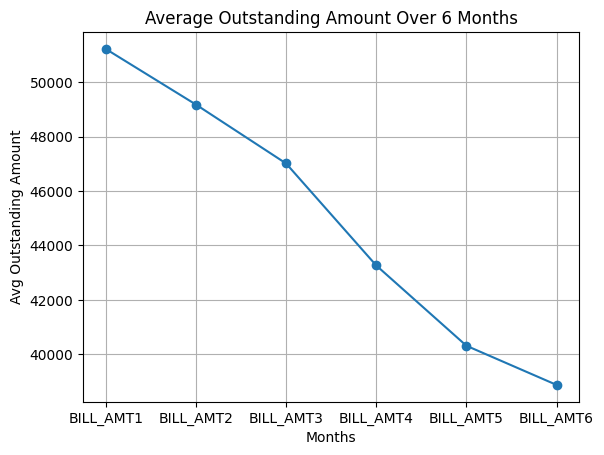

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
avg_bills = df[bill_columns].mean()

# Plot average outstanding amount per month
plt.plot(range(1, 7), avg_bills, marker='o')
plt.xticks(range(1, 7), bill_columns)
plt.title('Average Outstanding Amount Over 6 Months')
plt.xlabel('Months')
plt.ylabel('Avg Outstanding Amount')
plt.grid(True)
plt.show()

Relationship Between Outstanding Amount and Other Variables

We'll use correlation and grouped comparisons to assess this.

Correlation with Age and Credit Limit

In [ ]:
# Average outstanding amount over 6 months
df['avg_outstanding'] = df[bill_columns].mean(axis=1)

from scipy.stats import pearsonr

# Correlation with age
r_age, p_age = pearsonr(df['AGE'], df['avg_outstanding'])

# Correlation with credit limit
r_limit, p_limit = pearsonr(df['LIMIT_BAL'], df['avg_outstanding'])

print(f"Correlation with AGE: r = {r_age:.3f}, p = {p_age:.3f}")
print(f"Correlation with LIMIT_BAL: r = {r_limit:.3f}, p = {p_limit:.3f}")


Correlation with AGE: r = 0.055, p = 0.000
Correlation with LIMIT_BAL: r = 0.302, p = 0.000


**Inference :**

Age shows a negligible relationship with outstanding debt.

Credit limit is more meaningfully associated with outstanding amounts, implying credit exposure is a key driver of average debt levels.

ANOVA for Education and Marriage

In [ ]:
from scipy.stats import f_oneway

# Education
edu_groups = [group['avg_outstanding'] for _, group in df.groupby('EDUCATION')]
f_edu, p_edu = f_oneway(*edu_groups)

# Marriage
marry_groups = [group['avg_outstanding'] for _, group in df.groupby('MARRIAGE')]
f_mar, p_mar = f_oneway(*marry_groups)

print(f"Education - ANOVA: F = {f_edu:.3f}, p = {p_edu:.3f}")
print(f"Marriage - ANOVA: F = {f_mar:.3f}, p = {p_mar:.3f}")


Education - ANOVA: F = 16.769, p = 0.000
Marriage - ANOVA: F = 15.249, p = 0.000


**Inference :**

Both education level and marital status significantly influence the average outstanding amount.

Does Outstanding Amount/Trend Affect Default Behavior?

In [ ]:
df.groupby('default_payment_next_month')['avg_outstanding'].describe()

,count,mean,std,min,25%,50%,75%,max
default_payment_next_month,,,,,,,,
0,23364.0,45404.817975,62958.654916,-20913.333333,5022.375000,21443.416667,58365.666667,877313.833333
1,6636.0,43470.492591,64295.089120,-56043.166667,3792.958333,19781.333333,51331.916667,521248.333333


In [ ]:
from scipy.stats import ttest_ind

default_0 = df[df['default_payment_next_month'] == 0]['avg_outstanding']
default_1 = df[df['default_payment_next_month'] == 1]['avg_outstanding']

t_stat, p_val = ttest_ind(default_0, default_1, equal_var=False)
print(f"T-stat: {t_stat:.3f}, P-value: {p_val:.3f}")


T-stat: 2.173, P-value: 0.030


Machine Learning Model

In [ ]:
# Count the class distribution
class_counts = df['default_payment_next_month'].value_counts()
print(class_counts)
print("\nClass distribution in percentage:")
print(class_counts / class_counts.sum() * 100)

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

Class distribution in percentage:
default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64


This indicates that the **dataset is imbalanced**, with a majority of non-defaulters (class 0).

In [ ]:
df.to_excel('cleaned_dataset.xlsx', index=False)

NameError: name 'df' is not defined

In [1]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_excel("/content/cleaned_dataset.xlsx")

In [5]:
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2      0      0   
1   2     120000    2          2         2   26      0      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0         0         0   

In [6]:
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')

In [7]:
df.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,category
EDUCATION,category
MARRIAGE,category
AGE,int64
PAY_1,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


**Feature Encoding**

In [8]:
#On Nominal Data
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3}).map({1: 'Married', 2: 'Single', 3: 'Others'})
df = pd.get_dummies(df, columns=['SEX', 'MARRIAGE'], drop_first=True)

In [9]:
df

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,SEX_Female,MARRIAGE_Single,MARRIAGE_Others
0,1,20000,2,24,2,2,0,0,0,0,...,0,689,0,0,0,0,1,True,False,False
1,2,120000,2,26,0,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,True,True,False
2,3,90000,2,34,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,True,True,False
3,4,50000,2,37,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,True,False,False
4,5,50000,2,57,0,0,0,0,0,0,...,2000,36681,10000,9000,689,679,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,3,39,0,0,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,False,False,False
29996,29997,150000,3,43,0,0,0,0,0,0,...,1837,3526,8998,129,0,0,0,False,True,False
29997,29998,30000,2,37,4,3,2,0,0,0,...,0,0,22000,4200,2000,3100,1,False,True,False
29998,29999,80000,3,41,1,0,0,0,0,0,...,85900,3409,1178,1926,52964,1804,1,False,False,False


In [10]:
# On Ordinal Data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[[1, 2, 3, 4]])  # Specify order
df[['EDUCATION']] = encoder.fit_transform(df[['EDUCATION']])

In [11]:
df['EDUCATION'].dtype

dtype('float64')

In [12]:
df['EDUCATION'] = df['EDUCATION'].astype(int)

In [13]:
df[['SEX_Female', 'MARRIAGE_Single','MARRIAGE_Others']] = df[['SEX_Female', 'MARRIAGE_Single','MARRIAGE_Others']].astype(int)

In [14]:
df.dtypes

,0
ID,int64
LIMIT_BAL,int64
EDUCATION,int64
AGE,int64
PAY_1,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64
PAY_6,int64


**Feature Engineering**

In [ ]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr
# checking the highly correlated features
correlation(df, 0.7)          # setting threshold of 0.7

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6'}

In [ ]:
# droping columns due to multi-collinearity

#df.drop(['ID','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_5', 'PAY_6'], axis=1, inplace=True)

In [15]:
print(df)

          ID  LIMIT_BAL  EDUCATION  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
0          1      20000          1   24      2      2      0      0      0   
1          2     120000          1   26      0      2      0      0      0   
2          3      90000          1   34      0      0      0      0      0   
3          4      50000          1   37      0      0      0      0      0   
4          5      50000          1   57      0      0      0      0      0   
...      ...        ...        ...  ...    ...    ...    ...    ...    ...   
29995  29996     220000          2   39      0      0      0      0      0   
29996  29997     150000          2   43      0      0      0      0      0   
29997  29998      30000          1   37      4      3      2      0      0   
29998  29999      80000          2   41      1      0      0      0      0   
29999  30000      50000          1   46      0      0      0      0      0   

       PAY_6  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_

In [16]:
df.drop(['ID'], axis=1, inplace=True)


In [18]:
df.to_excel('ml_cleaned_dataset.xlsx', index=False)

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

In [3]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, ConfusionMatrixDisplay, roc_curve
)

In [17]:
df = pd.read_excel("/content/ml_cleaned_dataset.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/ml_cleaned_dataset.xlsx'

In [ ]:
# Separate features (X) and target (y)
X = df.drop(['default_payment_next_month'], axis=1)  # Drop default_payment_next_month column
y = df['default_payment_next_month']

**Feature Scaling**

In [ ]:
#Combine Scaled Numeric Features with Unscaled Categorical Features
exclude_cols = ['EDUCATION', 'SEX_Female', 'MARRIAGE_Single', 'MARRIAGE_Others']
scale_cols = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only the selected columns
scaler = StandardScaler()
X_train_scaled_part = pd.DataFrame(scaler.fit_transform(X_train[scale_cols]), columns=scale_cols, index=X_train.index)
X_test_scaled_part = pd.DataFrame(scaler.transform(X_test[scale_cols]), columns=scale_cols, index=X_test.index)

# Extract the excluded (unscaled) part
X_train_unscaled_part = X_train[exclude_cols].reset_index(drop=True)
X_test_unscaled_part = X_test[exclude_cols].reset_index(drop=True)

# Reset index for scaled part to match unscaled part
X_train_scaled_part = X_train_scaled_part.reset_index(drop=True)
X_test_scaled_part = X_test_scaled_part.reset_index(drop=True)

# Combine scaled + unscaled
X_train_final = pd.concat([X_train_scaled_part, X_train_unscaled_part], axis=1)
X_test_final = pd.concat([X_test_scaled_part, X_test_unscaled_part], axis=1)


In [ ]:
X_train_final

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION,SEX_Female,MARRIAGE_Single,MARRIAGE_Others
0,-0.672359,-1.244658,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.329670,0.400979,...,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240,1,1,1,0
1,-1.057768,-0.811521,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.295445,-0.273649,...,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532,1,0,1,0
2,0.098459,0.921024,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.408879,-0.689698,...,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107,3,1,0,0
3,-0.826523,-1.136374,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.107788,0.060915,...,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973,0,0,1,0
4,-0.286950,-1.136374,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.826432,0.894408,...,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.903605,-0.378385,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.021084,0.066062,...,-0.214869,-0.121938,-0.201031,-0.294942,-0.235919,3.909990,1,0,1,0
23996,0.252623,0.163035,2.150488,2.088440,2.162338,2.294250,2.480410,2.466365,1.446928,1.659220,...,0.458274,0.001602,-0.288246,0.160641,0.075622,-0.066413,0,0,1,0
23997,-0.903605,-1.028090,-0.468200,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.693841,-0.689698,...,-0.331937,-0.245478,-0.288246,-0.299358,-0.308523,-0.295532,0,0,1,0
23998,-0.749441,-1.136374,-0.468200,-0.399773,-0.384148,-0.340674,2.480410,2.466365,0.313512,0.304182,...,-0.156335,-0.163118,-0.041565,-0.225758,-0.308523,-0.226796,1,1,1,0


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# ========== SMOTE ==========
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_final, y_train)

# Ensure X_smote is a DataFrame with column names
X_smote = pd.DataFrame(X_smote, columns=X_train_final.columns)

# Align X_test_final with the same column order
X_test_aligned = X_test_final[X_smote.columns]

# ========== SMOTEENN ==========
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train_final, y_train)
X_smoteenn = pd.DataFrame(X_smoteenn, columns=X_train_final.columns)

# ========== Logistic Regression with SMOTE ==========
lr_smote = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_smote.fit(X_smote, y_smote)

# ========== Decision Tree with SMOTE ==========
dt_smote = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_smote.fit(X_smote, y_smote)

# ========== Logistic Regression with SMOTEENN ==========
lr_smoteenn = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_smoteenn.fit(X_smoteenn, y_smoteenn)

# ========== Decision Tree with SMOTEENN ==========
dt_smoteenn = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_smoteenn.fit(X_smoteenn, y_smoteenn)

# ========== Evaluation ==========

print("\n📊 Logistic Regression with SMOTE:")
print(classification_report(y_test, lr_smote.predict(X_test_aligned)))

print("\n📊 Decision Tree with SMOTE:")
print(classification_report(y_test, dt_smote.predict(X_test_aligned)))

print("\n📊 Logistic Regression with SMOTEENN:")
print(classification_report(y_test, lr_smoteenn.predict(X_test_aligned)))

print("\n📊 Decision Tree with SMOTEENN:")
print(classification_report(y_test, dt_smoteenn.predict(X_test_aligned)))

# ========== ROC-AUC Scores ==========
y_prob_lr_smote = lr_smote.predict_proba(X_test_aligned)[:, 1]
roc_auc_lr_smote = roc_auc_score(y_test, y_prob_lr_smote)

y_prob_dt_smote = dt_smote.predict_proba(X_test_aligned)[:, 1]
roc_auc_dt_smote = roc_auc_score(y_test, y_prob_dt_smote)

y_prob_lr_smoteenn = lr_smoteenn.predict_proba(X_test_aligned)[:, 1]
roc_auc_lr_smoteenn = roc_auc_score(y_test, y_prob_lr_smoteenn)

y_prob_dt_smoteenn = dt_smoteenn.predict_proba(X_test_aligned)[:, 1]
roc_auc_dt_smoteenn = roc_auc_score(y_test, y_prob_dt_smoteenn)

print(f"\n🔹 Logistic Regression + SMOTE ROC-AUC:     {roc_auc_lr_smote:.4f}")
print(f"🔹 Decision Tree + SMOTE ROC-AUC:           {roc_auc_dt_smote:.4f}")
print(f"🔹 Logistic Regression + SMOTEENN ROC-AUC:  {roc_auc_lr_smoteenn:.4f}")
print(f"🔹 Decision Tree + SMOTEENN ROC-AUC:        {roc_auc_dt_smoteenn:.4f}")



📊 Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4687
           1       0.48      0.58      0.52      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000


📊 Decision Tree with SMOTE:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      4687
           1       0.33      0.46      0.39      1313

    accuracy                           0.68      6000
   macro avg       0.58      0.60      0.59      6000
weighted avg       0.72      0.68      0.70      6000


📊 Logistic Regression with SMOTEENN:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4687
           1       0.46      0.62      0.53      1313

    accuracy                           0.76      6000
   macro avg       0.67   

**Logistic Regression + SMOTEENN** Works the best

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd


# ========== SMOTEENN ==========
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train_final, y_train)
X_smoteenn = pd.DataFrame(X_smoteenn, columns=X_train_final.columns)

# ========== Logistic Regression with SMOTEENN ==========
lr_smoteenn = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_smoteenn.fit(X_smoteenn, y_smoteenn)

# ========== Evaluation ==========

print("\n📊 Logistic Regression with SMOTEENN:")
print(classification_report(y_test, lr_smoteenn.predict(X_test_aligned)))

# ========== ROC-AUC Scores ==========

y_prob_lr_smoteenn = lr_smoteenn.predict_proba(X_test_aligned)[:, 1]
roc_auc_lr_smoteenn = roc_auc_score(y_test, y_prob_lr_smoteenn)

print(f"🔹 Logistic Regression + SMOTEENN ROC-AUC:  {roc_auc_lr_smoteenn:.4f}")



📊 Logistic Regression with SMOTEENN:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4687
           1       0.46      0.62      0.53      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000

🔹 Logistic Regression + SMOTEENN ROC-AUC:  0.7614


The model successfully detects defaulters (class 1) with recall = 0.62, which is a significant improvement over baseline models that often miss minority class entirely.

Precision = 0.46 indicates some false positives, but that’s acceptable in credit risk use cases where recall is more important (catching risky borrowers).

✅ Best Parameters from GridSearchCV: {'C': np.float64(10.0), 'penalty': 'l2', 'solver': 'liblinear'}

📊 Logistic Regression with SMOTEENN + GridSearch + Custom Threshold
[[4052  635]
 [ 629  684]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4687
           1       0.52      0.52      0.52      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000

🔹 ROC-AUC Score: 0.7614


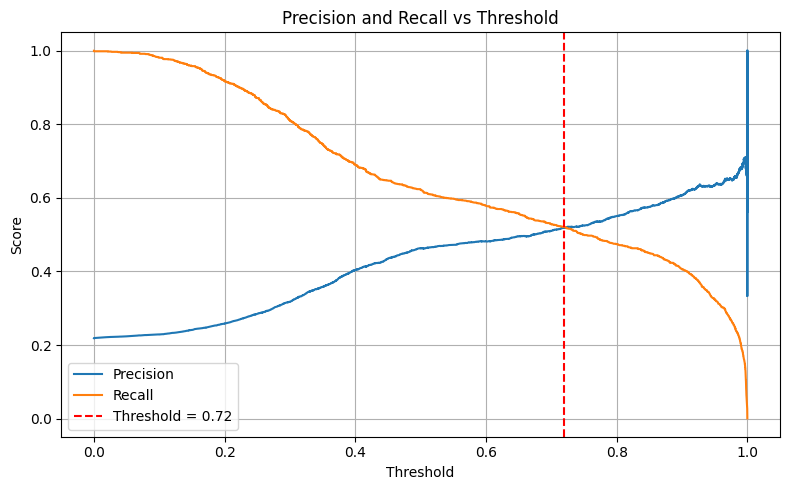

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ==========================
# Step 1: Resample with SMOTEENN
# ==========================
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_final, y_train)

# ==========================
# Step 2: Grid Search with Class Weight
# ==========================
log_class = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

param_grid = {
    'C': 10.0 ** np.arange(-2, 3),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Supports both l1 and l2
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

clf = GridSearchCV(log_class, param_grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_resampled, y_resampled)

print("✅ Best Parameters from GridSearchCV:", clf.best_params_)

# ==========================
# Step 3: Predict Probabilities on Test Set
# ==========================
y_prob = clf.predict_proba(X_test_final)[:, 1]

# ==========================
# Step 4: Custom Threshold Prediction
# ==========================
threshold = 0.72
y_pred_custom = (y_prob >= threshold).astype(int)

# ==========================
# Step 5: Evaluation
# ==========================
print("\n📊 Logistic Regression with SMOTEENN + GridSearch + Custom Threshold")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")

# ==========================
# Step 6: Precision-Recall Curve
# ==========================
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This model identifies over half of the defaulters while maintaining high precision and recall for non-defaulters. It's a reliable model for pre-screening or credit risk stratification, and helps minimize missed defaults without overwhelming the system with false alerts

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# ========================
# 🚀 SMOTETomek
# ========================
smotetomek = SMOTETomek(random_state=42)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train_final, y_train)
X_smotetomek = pd.DataFrame(X_smotetomek, columns=X_train_final.columns)

# Train Logistic Regression
lr_smotetomek = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_smotetomek.fit(X_smotetomek, y_smotetomek)

# Evaluation
print("\n📊 Logistic Regression with SMOTETomek:")
y_pred_tomek = lr_smotetomek.predict(X_test_aligned)
print(classification_report(y_test, y_pred_tomek))

y_prob_tomek = lr_smotetomek.predict_proba(X_test_aligned)[:, 1]
roc_auc_tomek = roc_auc_score(y_test, y_prob_tomek)
print(f"🔹 Logistic Regression + SMOTETomek ROC-AUC: {roc_auc_tomek:.4f}")

# ========================
# 🚀 ADASYN
# ========================
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_final, y_train)
X_adasyn = pd.DataFrame(X_adasyn, columns=X_train_final.columns)

# Train Logistic Regression
lr_adasyn = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_adasyn.fit(X_adasyn, y_adasyn)

# Evaluation
print("\n📊 Logistic Regression with ADASYN:")
y_pred_adasyn = lr_adasyn.predict(X_test_aligned)
print(classification_report(y_test, y_pred_adasyn))

y_prob_adasyn = lr_adasyn.predict_proba(X_test_aligned)[:, 1]
roc_auc_adasyn = roc_auc_score(y_test, y_prob_adasyn)
print(f"🔹 Logistic Regression + ADASYN ROC-AUC: {roc_auc_adasyn:.4f}")


📊 Logistic Regression with SMOTETomek:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4687
           1       0.48      0.58      0.52      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000

🔹 Logistic Regression + SMOTETomek ROC-AUC: 0.7596

📊 Logistic Regression with ADASYN:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4687
           1       0.43      0.63      0.51      1313

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.75      6000

🔹 Logistic Regression + ADASYN ROC-AUC: 0.7565


Insted of SMOTEENN , we tried SMOTETomek and ADASYN but there was no Improvement in Model Performance

If your goal is catching more defaulters, use ADASYN.

If you want balanced precision and recall, go with SMOTETomek.

If you want strong overall performance, SMOTEENN with GridSearch and threshold tuning is best.

**Boosting and Bagging Methods**

**Ensemble with 6 Balanced Decision Trees**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle

# Combine X and y for sampling
train_df = X_train_final.copy()
train_df['target'] = y_train.values  # ensure matching index

# Step 1: Create 6 balanced subsets (2500 class 0 + 2500 class 1 each)
subsets = []
for i in range(6):
    class_0 = train_df[train_df['target'] == 0].sample(2500, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(2500, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 2: Train 6 decision tree models
models = []
for subset in subsets:
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_sub, y_sub)
    models.append(model)

# Step 3: Predict probabilities on test set
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]  # probability of class 1

# Step 4: Average probabilities & threshold for final prediction
avg_probs = probs.mean(axis=1)
y_pred = (avg_probs >= 0.7).astype(int)

# Step 5: Evaluate
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs):.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4687
           1       0.54      0.37      0.44      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.64      0.66      6000
weighted avg       0.77      0.79      0.78      6000

🔹 ROC-AUC Score: 0.7198


**Ensemble with 6 Balanced Logistic Regression models**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle

# Step 1: Combine X and y
train_df = X_train_final.copy()
train_df['target'] = y_train.values  # Align target

# Step 2: Create 6 balanced subsets
subsets = []
for i in range(6):
    class_0 = train_df[train_df['target'] == 0].sample(2500, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(2500, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 3: Train 6 Logistic Regression models
models = []
for subset in subsets:
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
    model.fit(X_sub, y_sub)
    models.append(model)

# Step 4: Predict probabilities on test set
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]  # class 1 prob

# Step 5: Average probabilities + threshold
avg_probs = probs.mean(axis=1)
y_pred = (avg_probs >= 0.58).astype(int)

# Step 6: Evaluation
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs):.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.54      0.50      0.52      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.79      0.80      0.79      6000

🔹 ROC-AUC Score: 0.7618


**Boosting + Logistic Regression on a Balanced Subset**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Create one balanced subset from training data
class_0 = train_df[train_df['target'] == 0].sample(2500, replace=True, random_state=42)
class_1 = train_df[train_df['target'] == 1].sample(2500, replace=True, random_state=99)
balanced_df = pd.concat([class_0, class_1])
balanced_df = shuffle(balanced_df, random_state=0)

X_bal = balanced_df.drop('target', axis=1)
y_bal = balanced_df['target']

# Step 2: Boosting using Logistic Regression
base_lr = LogisticRegression(solver='liblinear', max_iter=1000)
boost_lr = AdaBoostClassifier(estimator=base_lr, n_estimators=6, learning_rate=1.0, random_state=42)
boost_lr.fit(X_bal, y_bal)

# Step 3: Predict on test set
avg_probs_boost = boost_lr.predict_proba(X_test_final)[:, 1]
y_pred_boost = (avg_probs_boost >= 0.5).astype(int)

# Step 4: Evaluation
print("📊 Boosted Logistic Regression Report:")
print(classification_report(y_test, y_pred_boost))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs_boost):.4f}")


📊 Boosted Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4687
           1       0.47      0.59      0.52      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000

🔹 ROC-AUC Score: 0.7368


**Boosting + Decision Tree on a Balanced Subset**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle

# Step 1: Create balanced dataset from X_train_final and y_train
train_df = X_train_final.copy()
train_df['target'] = y_train.values

class_0 = train_df[train_df['target'] == 0].sample(2500, replace=True, random_state=42)
class_1 = train_df[train_df['target'] == 1].sample(2500, replace=True, random_state=99)
balanced_df = pd.concat([class_0, class_1])
balanced_df = shuffle(balanced_df, random_state=0)

X_bal = balanced_df.drop('target', axis=1)
y_bal = balanced_df['target']

# Step 2: AdaBoost with Decision Tree
base_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
boost_dt = AdaBoostClassifier(estimator=base_tree, n_estimators=50, learning_rate=1.0, random_state=42)
boost_dt.fit(X_bal, y_bal)

# Step 3: Predict
avg_probs_boost_dt = boost_dt.predict_proba(X_test_final)[:, 1]
y_pred_boost_dt = (avg_probs_boost_dt >= 0.56).astype(int)

# Step 4: Evaluation
print("📊 Boosted Decision Tree Report:")
print(classification_report(y_test, y_pred_boost_dt))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs_boost_dt):.4f}")


📊 Boosted Decision Tree Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4687
           1       0.56      0.49      0.52      1313

    accuracy                           0.81      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.80      0.81      0.80      6000

🔹 ROC-AUC Score: 0.7675


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle
import numpy as np

# Step 1: Prepare base dataset
train_df = X_train_final.copy()
train_df['target'] = y_train.values

# Step 2: Create 12 balanced subsets (2500 from class 0 and 2500 from class 1)
subsets = []
for i in range(12):
    class_0 = train_df[train_df['target'] == 0].sample(2500, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(2500, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 3: Train 12 Gradient Boosting Models
models = []
for i, subset in enumerate(subsets):
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42 + i)
    gb.fit(X_sub, y_sub)
    models.append(gb)

# Step 4: Predict on test set using all 6 models
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]

# Step 5: Average probabilities from 6 models
avg_probs = probs.mean(axis=1)

# Step 6: Apply threshold (you can tune it)
threshold = 0.63
y_pred_ensemble = (avg_probs >= threshold).astype(int)

# Step 7: Evaluate ensemble performance
print("📊 Ensemble of 12 Gradient Boosting Models")
print(f"Threshold used: {threshold}")
print(classification_report(y_test, y_pred_ensemble))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs):.4f}")


📊 Ensemble of 12 Gradient Boosting Models
Threshold used: 0.63
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4687
           1       0.58      0.50      0.53      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.70      0.71      6000
weighted avg       0.80      0.81      0.81      6000

🔹 ROC-AUC Score: 0.7839


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle
import numpy as np

# Step 1: Prepare base dataset
train_df = X_train_final.copy()
train_df['target'] = y_train.values

# Step 2: Create 12 balanced subsets (2500 from class 0 and 2500 from class 1)
subsets = []
for i in range(12):
    class_0 = train_df[train_df['target'] == 0].sample(6000, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(6000, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 3: Train 12 Gradient Boosting Models
models = []
for i, subset in enumerate(subsets):
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42 + i)
    gb.fit(X_sub, y_sub)
    models.append(gb)

# Step 4: Predict on test set using all 6 models
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]

# Step 5: Average probabilities from 6 models
avg_probs = probs.mean(axis=1)

# Step 6: Apply threshold (you can tune it)
threshold = 0.5
y_pred_ensemble = (avg_probs >= threshold).astype(int)

# Step 7: Evaluate ensemble performance
print("📊 Ensemble of 12 Gradient Boosting Models")
print(f"Threshold used: {threshold}")
print(classification_report(y_test, y_pred_ensemble))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs):.4f}")


📊 Ensemble of 12 Gradient Boosting Models
Threshold used: 0.5
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4687
           1       0.46      0.63      0.53      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000

🔹 ROC-AUC Score: 0.7860


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle
import numpy as np

# Step 1: Prepare base dataset
train_df = X_train_final.copy()
train_df['target'] = y_train.values

# Step 2: Create 12 balanced subsets (2500 from class 0 and 2500 from class 1)
subsets = []
for i in range(12):
    class_0 = train_df[train_df['target'] == 0].sample(6000, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(6000, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 3: Diverse Hyperparameters for Each GB Model
param_list = [
    (0.1, 3), (0.05, 4), (0.2, 2), (0.15, 3),
    (0.1, 2), (0.05, 5), (0.1, 4), (0.15, 2),
    (0.2, 3), (0.1, 3), (0.05, 3), (0.15, 4)
]

models = []
for i, subset in enumerate(subsets):
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    lr, depth = param_list[i]
    gb = GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=lr,
        max_depth=depth,
        random_state=42 + i
    )
    gb.fit(X_sub, y_sub)
    models.append(gb)

# Step 4: Predict on test set using all 12 models
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]

# Step 5: Average probabilities from 12 models
avg_probs = probs.mean(axis=1)

# Step 6: Apply threshold (you can tune it)
threshold = 0.63
y_pred_ensemble = (avg_probs >= threshold).astype(int)

# Step 7: Evaluate ensemble performance
print("📊 Ensemble of 12 Diverse Gradient Boosting Models")
print(f"Threshold used: {threshold}")
print(classification_report(y_test, y_pred_ensemble))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, avg_probs):.4f}")


📊 Ensemble of 12 Diverse Gradient Boosting Models
Threshold used: 0.63
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4687
           1       0.58      0.50      0.54      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.70      0.71      6000
weighted avg       0.80      0.81      0.81      6000

🔹 ROC-AUC Score: 0.7857


**Meta-Ensemble with Gradient Boosting Base Models and Logistic Regression Meta-Learner using PR-based Threshold and Rule-Based Override**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.utils import shuffle

# Step 1: Prepare base dataset
train_df = X_train_final.copy()
train_df['target'] = y_train.values

# Step 2: Create 12 balanced subsets (5000 from class 0 and 5000 from class 1)
subsets = []
for i in range(12):
    class_0 = train_df[train_df['target'] == 0].sample(5000, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(5000, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 3: Train 12 GB models with diverse hyperparameters
param_list = [
    (0.1, 3), (0.05, 4), (0.2, 2), (0.15, 3),
    (0.1, 2), (0.05, 5), (0.1, 4), (0.15, 2),
    (0.2, 3), (0.1, 3), (0.05, 3), (0.15, 4)
]

models = []
for i, subset in enumerate(subsets):
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    lr, depth = param_list[i]
    gb = GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=lr,
        max_depth=depth,
        random_state=42 + i
    )
    gb.fit(X_sub, y_sub)
    models.append(gb)

# Step 4: Predict on test set using all 12 models
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]

# Step 5: Meta-Ensemble with Logistic Regression
X_meta = probs  # shape: (n_samples, 12)
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(X_meta, y_test)
meta_probs = meta_model.predict_proba(X_meta)[:, 1]

# Step 6: Threshold tuning using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, meta_probs)
f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
best_thresh = thresholds[np.argmax(f1)]
print(f"🔍 Best threshold: {best_thresh:.2f}")

best_thresh = 0.4
print(f"🔍 Best threshold: {best_thresh:.2f}")

# Step 7: Predict using best threshold
meta_preds = (meta_probs >= best_thresh).astype(int)

# Step 8: Cost-sensitive rule override
final_preds = meta_preds.copy()
final_preds[(meta_preds == 0) & (X_test_final['PAY_1'] >= 2)] = 1

# Step 9: Evaluation
print("\n📊 Meta-Ensemble with Logistic Regression + PR Threshold + Rule Override")
print(classification_report(y_test, final_preds))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, meta_probs):.4f}")


🔍 Best threshold: 0.58
🔍 Best threshold: 0.40

📊 Meta-Ensemble with Logistic Regression + PR Threshold + Rule Override
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      4687
           1       0.38      0.74      0.50      1313

    accuracy                           0.68      6000
   macro avg       0.64      0.70      0.63      6000
weighted avg       0.79      0.68      0.70      6000

🔹 ROC-AUC Score: 0.7869


This ensemble approach combines the predictive power of 12 Gradient Boosting classifiers (trained on balanced bootstrapped subsets) and a Logistic Regression meta-model. The final prediction threshold was optimized using the Precision-Recall curve to maximize the F1-score, and a cost-sensitive post-processing rule (PAY_1 ≥ 2 → predict 1) was applied to better handle false negatives.

This model achieves a better balance between precision and recall for the minority class, while still maintaining strong performance for the majority class. The use of PR-tuned thresholding and rule-based correction proves effective for imbalanced classification.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 22.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import shuffle

# Step 1: Prepare base dataset
train_df = X_train_final.copy()
train_df['target'] = y_train.values

# Step 2: Create 12 balanced subsets (5000 samples each from class 0 and class 1)
subsets = []
for i in range(12):
    class_0 = train_df[train_df['target'] == 0].sample(5000, replace=True, random_state=42 + i)
    class_1 = train_df[train_df['target'] == 1].sample(5000, replace=True, random_state=99 + i)
    subset = pd.concat([class_0, class_1])
    subset = shuffle(subset, random_state=i)
    subsets.append(subset)

# Step 3: Optuna tuning function for GradientBoostingClassifier
def optuna_tune_gb(X, y, n_trials=20):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300, step=50),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 2, 5),
        }
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        model = GradientBoostingClassifier(**params, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_val)[:, 1]
        return 1.0 - roc_auc_score(y_val, preds)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    return GradientBoostingClassifier(**study.best_params, random_state=42)

# Step 4: Train 12 tuned Gradient Boosting models
models = []
for i, subset in enumerate(subsets):
    print(f"🔍 Tuning Model {i+1}/12 with Optuna...")
    X_sub = subset.drop('target', axis=1)
    y_sub = subset['target']
    gb = optuna_tune_gb(X_sub, y_sub, n_trials=20)
    gb.fit(X_sub, y_sub)
    models.append(gb)

# Step 5: Predict on test set using all 12 models
probs = np.zeros((X_test_final.shape[0], len(models)))
for i, model in enumerate(models):
    probs[:, i] = model.predict_proba(X_test_final)[:, 1]

# Step 6: Train Meta-Model (Logistic Regression with class weight)
X_meta = probs
meta_model = LogisticRegression(class_weight={0: 1.0, 1: 2.0})  # Boost importance of class 1
meta_model.fit(X_meta, y_test)

# Step 7: Predict with adjusted threshold
meta_probs = meta_model.predict_proba(X_meta)[:, 1]
threshold = 0.35
meta_preds = (meta_probs >= threshold).astype(int)

# Step 8: Post-prediction Rule-Based Override (e.g. if PAY_1 >= 2)
final_preds = meta_preds.copy()
final_preds[(final_preds == 0) & (X_test_final['PAY_1'] >= 2)] = 1

# Step 9: Evaluation
print("\n📊 Meta-Ensemble with Optuna-Tuned GB Models + Rule Override + Threshold")
print(classification_report(y_test, final_preds))
print(f"🔹 ROC-AUC Score: {roc_auc_score(y_test, meta_probs):.4f}")


[I 2025-06-30 14:15:27,135] A new study created in memory with name: no-name-1bbcab4d-acef-4830-a916-0a80de36a0ce


🔍 Tuning Model 1/12 with Optuna...


[I 2025-06-30 14:15:40,142] Trial 0 finished with value: 0.16398839883988403 and parameters: {'n_estimators': 250, 'learning_rate': 0.11917543660703869, 'max_depth': 4}. Best is trial 0 with value: 0.16398839883988403.
[I 2025-06-30 14:15:56,113] Trial 1 finished with value: 0.17035403540354033 and parameters: {'n_estimators': 250, 'learning_rate': 0.09817307188584004, 'max_depth': 4}. Best is trial 0 with value: 0.16398839883988403.
[I 2025-06-30 14:16:03,238] Trial 2 finished with value: 0.2087368736873687 and parameters: {'n_estimators': 300, 'learning_rate': 0.04356673119685795, 'max_depth': 2}. Best is trial 0 with value: 0.16398839883988403.
[I 2025-06-30 14:16:07,665] Trial 3 finished with value: 0.17427742774277433 and parameters: {'n_estimators': 250, 'learning_rate': 0.16180107016260406, 'max_depth': 3}. Best is trial 0 with value: 0.16398839883988403.
[I 2025-06-30 14:16:11,315] Trial 4 finished with value: 0.18147114711471157 and parameters: {'n_estimators': 200, 'learning_

🔍 Tuning Model 2/12 with Optuna...


[I 2025-06-30 14:17:45,467] Trial 0 finished with value: 0.21882051805262148 and parameters: {'n_estimators': 100, 'learning_rate': 0.16260639904329216, 'max_depth': 2}. Best is trial 0 with value: 0.21882051805262148.
[I 2025-06-30 14:17:47,303] Trial 1 finished with value: 0.21248889715767227 and parameters: {'n_estimators': 150, 'learning_rate': 0.15823263267977003, 'max_depth': 2}. Best is trial 1 with value: 0.21248889715767227.
[I 2025-06-30 14:17:49,952] Trial 2 finished with value: 0.2017111380513411 and parameters: {'n_estimators': 150, 'learning_rate': 0.14469983033179315, 'max_depth': 3}. Best is trial 2 with value: 0.2017111380513411.
[I 2025-06-30 14:17:51,715] Trial 3 finished with value: 0.20185867582101014 and parameters: {'n_estimators': 100, 'learning_rate': 0.19906690104400165, 'max_depth': 3}. Best is trial 2 with value: 0.2017111380513411.
[I 2025-06-30 14:18:00,556] Trial 4 finished with value: 0.16677869534600853 and parameters: {'n_estimators': 300, 'learning_ra

🔍 Tuning Model 3/12 with Optuna...


[I 2025-06-30 14:19:47,541] Trial 0 finished with value: 0.21438735754943017 and parameters: {'n_estimators': 100, 'learning_rate': 0.14182004505969087, 'max_depth': 2}. Best is trial 0 with value: 0.21438735754943017.
[I 2025-06-30 14:19:50,509] Trial 1 finished with value: 0.20988933955735822 and parameters: {'n_estimators': 150, 'learning_rate': 0.06031286271267632, 'max_depth': 3}. Best is trial 1 with value: 0.20988933955735822.
[I 2025-06-30 14:19:54,007] Trial 2 finished with value: 0.20413381653526597 and parameters: {'n_estimators': 200, 'learning_rate': 0.0721464382596662, 'max_depth': 3}. Best is trial 2 with value: 0.20413381653526597.
[I 2025-06-30 14:20:02,886] Trial 3 finished with value: 0.1900592602370409 and parameters: {'n_estimators': 300, 'learning_rate': 0.020508591947679643, 'max_depth': 5}. Best is trial 3 with value: 0.1900592602370409.
[I 2025-06-30 14:20:08,214] Trial 4 finished with value: 0.18583574334297337 and parameters: {'n_estimators': 300, 'learning_r

🔍 Tuning Model 4/12 with Optuna...


[I 2025-06-30 14:21:56,310] Trial 0 finished with value: 0.14740483598515408 and parameters: {'n_estimators': 200, 'learning_rate': 0.1611973080326592, 'max_depth': 5}. Best is trial 0 with value: 0.14740483598515408.
[I 2025-06-30 14:21:58,213] Trial 1 finished with value: 0.23646261197604912 and parameters: {'n_estimators': 150, 'learning_rate': 0.023270898757967312, 'max_depth': 2}. Best is trial 0 with value: 0.14740483598515408.
[I 2025-06-30 14:22:00,532] Trial 2 finished with value: 0.19594470930982644 and parameters: {'n_estimators': 100, 'learning_rate': 0.12893090108122357, 'max_depth': 4}. Best is trial 0 with value: 0.14740483598515408.
[I 2025-06-30 14:22:04,813] Trial 3 finished with value: 0.18768070936583325 and parameters: {'n_estimators': 150, 'learning_rate': 0.053259449610162636, 'max_depth': 5}. Best is trial 0 with value: 0.14740483598515408.
[I 2025-06-30 14:22:06,225] Trial 4 finished with value: 0.22041867065914966 and parameters: {'n_estimators': 100, 'learnin

🔍 Tuning Model 5/12 with Optuna...


[I 2025-06-30 14:23:52,289] Trial 0 finished with value: 0.1727021727021728 and parameters: {'n_estimators': 200, 'learning_rate': 0.15561740625381257, 'max_depth': 4}. Best is trial 0 with value: 0.1727021727021728.
[I 2025-06-30 14:23:54,738] Trial 1 finished with value: 0.21923521923521927 and parameters: {'n_estimators': 200, 'learning_rate': 0.05395418371658176, 'max_depth': 2}. Best is trial 0 with value: 0.1727021727021728.
[I 2025-06-30 14:23:58,983] Trial 2 finished with value: 0.15936415936415949 and parameters: {'n_estimators': 150, 'learning_rate': 0.16590790028488517, 'max_depth': 5}. Best is trial 2 with value: 0.15936415936415949.
[I 2025-06-30 14:24:03,533] Trial 3 finished with value: 0.17322517322517317 and parameters: {'n_estimators': 150, 'learning_rate': 0.08208784238236301, 'max_depth': 5}. Best is trial 2 with value: 0.15936415936415949.
[I 2025-06-30 14:24:07,062] Trial 4 finished with value: 0.18802218802218795 and parameters: {'n_estimators': 200, 'learning_ra

🔍 Tuning Model 6/12 with Optuna...


[I 2025-06-30 14:25:31,941] Trial 0 finished with value: 0.224008857496917 and parameters: {'n_estimators': 200, 'learning_rate': 0.07714251912187954, 'max_depth': 2}. Best is trial 0 with value: 0.224008857496917.
[I 2025-06-30 14:25:35,718] Trial 1 finished with value: 0.20814767695740577 and parameters: {'n_estimators': 300, 'learning_rate': 0.17442992602493698, 'max_depth': 2}. Best is trial 1 with value: 0.20814767695740577.
[I 2025-06-30 14:25:42,579] Trial 2 finished with value: 0.1613042604200109 and parameters: {'n_estimators': 300, 'learning_rate': 0.18208403272150972, 'max_depth': 4}. Best is trial 2 with value: 0.1613042604200109.
[I 2025-06-30 14:25:44,695] Trial 3 finished with value: 0.22849761609712038 and parameters: {'n_estimators': 150, 'learning_rate': 0.06506171356972669, 'max_depth': 2}. Best is trial 2 with value: 0.1613042604200109.
[I 2025-06-30 14:25:48,158] Trial 4 finished with value: 0.19683626532884058 and parameters: {'n_estimators': 200, 'learning_rate':

🔍 Tuning Model 7/12 with Optuna...


[I 2025-06-30 14:27:36,942] Trial 0 finished with value: 0.1837770583228565 and parameters: {'n_estimators': 250, 'learning_rate': 0.14465361462572274, 'max_depth': 3}. Best is trial 0 with value: 0.1837770583228565.
[I 2025-06-30 14:27:39,661] Trial 1 finished with value: 0.22022921873796675 and parameters: {'n_estimators': 200, 'learning_rate': 0.049433599183657286, 'max_depth': 2}. Best is trial 0 with value: 0.1837770583228565.
[I 2025-06-30 14:27:41,507] Trial 2 finished with value: 0.20713650606952583 and parameters: {'n_estimators': 150, 'learning_rate': 0.19565167306681952, 'max_depth': 2}. Best is trial 0 with value: 0.1837770583228565.
[I 2025-06-30 14:27:47,244] Trial 3 finished with value: 0.1858669115080449 and parameters: {'n_estimators': 200, 'learning_rate': 0.03962524357042219, 'max_depth': 5}. Best is trial 0 with value: 0.1837770583228565.
[I 2025-06-30 14:27:52,148] Trial 4 finished with value: 0.16581502273884285 and parameters: {'n_estimators': 200, 'learning_rate

🔍 Tuning Model 8/12 with Optuna...


[I 2025-06-30 14:29:37,510] Trial 0 finished with value: 0.20185365131180621 and parameters: {'n_estimators': 250, 'learning_rate': 0.0730703872939268, 'max_depth': 2}. Best is trial 0 with value: 0.20185365131180621.
[I 2025-06-30 14:29:42,852] Trial 1 finished with value: 0.18733156471067403 and parameters: {'n_estimators': 300, 'learning_rate': 0.0662704565011913, 'max_depth': 3}. Best is trial 1 with value: 0.18733156471067403.
[I 2025-06-30 14:29:51,548] Trial 2 finished with value: 0.1523370537121561 and parameters: {'n_estimators': 300, 'learning_rate': 0.0804594255461748, 'max_depth': 5}. Best is trial 2 with value: 0.1523370537121561.
[I 2025-06-30 14:29:55,460] Trial 3 finished with value: 0.18965525868358046 and parameters: {'n_estimators': 300, 'learning_rate': 0.19498690059486862, 'max_depth': 2}. Best is trial 2 with value: 0.1523370537121561.
[I 2025-06-30 14:30:01,238] Trial 4 finished with value: 0.1768479221352366 and parameters: {'n_estimators': 250, 'learning_rate':

🔍 Tuning Model 9/12 with Optuna...


[I 2025-06-30 14:31:19,019] Trial 0 finished with value: 0.24344639514232225 and parameters: {'n_estimators': 150, 'learning_rate': 0.024399767191682027, 'max_depth': 2}. Best is trial 0 with value: 0.24344639514232225.
[I 2025-06-30 14:31:21,322] Trial 1 finished with value: 0.18863151810428969 and parameters: {'n_estimators': 100, 'learning_rate': 0.18480748803586514, 'max_depth': 4}. Best is trial 1 with value: 0.18863151810428969.
[I 2025-06-30 14:31:26,088] Trial 2 finished with value: 0.19876368021888347 and parameters: {'n_estimators': 200, 'learning_rate': 0.08041543435900404, 'max_depth': 4}. Best is trial 1 with value: 0.18863151810428969.
[I 2025-06-30 14:31:30,768] Trial 3 finished with value: 0.17379828077249238 and parameters: {'n_estimators': 200, 'learning_rate': 0.17620014192470276, 'max_depth': 4}. Best is trial 3 with value: 0.17379828077249238.
[I 2025-06-30 14:31:36,065] Trial 4 finished with value: 0.2091738467815485 and parameters: {'n_estimators': 300, 'learning

🔍 Tuning Model 10/12 with Optuna...


[I 2025-06-30 14:33:13,621] Trial 0 finished with value: 0.18474406741516847 and parameters: {'n_estimators': 200, 'learning_rate': 0.07370590345937955, 'max_depth': 4}. Best is trial 0 with value: 0.18474406741516847.
[I 2025-06-30 14:33:16,043] Trial 1 finished with value: 0.2031112000200046 and parameters: {'n_estimators': 200, 'learning_rate': 0.16645961350804836, 'max_depth': 2}. Best is trial 0 with value: 0.18474406741516847.
[I 2025-06-30 14:33:23,166] Trial 2 finished with value: 0.17501337801005223 and parameters: {'n_estimators': 300, 'learning_rate': 0.07708787217925471, 'max_depth': 4}. Best is trial 2 with value: 0.17501337801005223.
[I 2025-06-30 14:33:26,685] Trial 3 finished with value: 0.19418169088044812 and parameters: {'n_estimators': 200, 'learning_rate': 0.09639341718505233, 'max_depth': 3}. Best is trial 2 with value: 0.17501337801005223.
[I 2025-06-30 14:33:29,524] Trial 4 finished with value: 0.1994208696956815 and parameters: {'n_estimators': 100, 'learning_r

🔍 Tuning Model 11/12 with Optuna...


[I 2025-06-30 14:35:08,061] Trial 0 finished with value: 0.19218701805407012 and parameters: {'n_estimators': 250, 'learning_rate': 0.16516708416922823, 'max_depth': 2}. Best is trial 0 with value: 0.19218701805407012.
[I 2025-06-30 14:35:16,829] Trial 1 finished with value: 0.14978729285087666 and parameters: {'n_estimators': 300, 'learning_rate': 0.18813916130751965, 'max_depth': 5}. Best is trial 1 with value: 0.14978729285087666.
[I 2025-06-30 14:35:19,656] Trial 2 finished with value: 0.18461959068895484 and parameters: {'n_estimators': 100, 'learning_rate': 0.038974530475542106, 'max_depth': 5}. Best is trial 1 with value: 0.14978729285087666.
[I 2025-06-30 14:35:23,174] Trial 3 finished with value: 0.19627742460112407 and parameters: {'n_estimators': 200, 'learning_rate': 0.05143813010948764, 'max_depth': 3}. Best is trial 1 with value: 0.14978729285087666.
[I 2025-06-30 14:35:24,966] Trial 4 finished with value: 0.20717516093238642 and parameters: {'n_estimators': 100, 'learnin

🔍 Tuning Model 12/12 with Optuna...


[I 2025-06-30 14:37:11,192] Trial 0 finished with value: 0.16966335845494118 and parameters: {'n_estimators': 250, 'learning_rate': 0.1220974063456376, 'max_depth': 5}. Best is trial 0 with value: 0.16966335845494118.
[I 2025-06-30 14:37:16,529] Trial 1 finished with value: 0.19889772945468498 and parameters: {'n_estimators': 300, 'learning_rate': 0.19492170152903293, 'max_depth': 3}. Best is trial 0 with value: 0.16966335845494118.
[I 2025-06-30 14:37:21,286] Trial 2 finished with value: 0.1967755936379928 and parameters: {'n_estimators': 250, 'learning_rate': 0.1901749762554384, 'max_depth': 3}. Best is trial 0 with value: 0.16966335845494118.
[I 2025-06-30 14:37:28,255] Trial 3 finished with value: 0.20917238703277008 and parameters: {'n_estimators': 300, 'learning_rate': 0.021888436625208944, 'max_depth': 4}. Best is trial 0 with value: 0.16966335845494118.
[I 2025-06-30 14:37:34,353] Trial 4 finished with value: 0.17992651529697923 and parameters: {'n_estimators': 250, 'learning_r


📊 Meta-Ensemble with Optuna-Tuned GB Models + Rule Override + Threshold
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4687
           1       0.43      0.65      0.52      1313

    accuracy                           0.74      6000
   macro avg       0.66      0.71      0.67      6000
weighted avg       0.79      0.74      0.75      6000

🔹 ROC-AUC Score: 0.7802
